In [47]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
words = open('names.txt','r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

In [52]:
char_set = {}
number_set = {}
for i,char in enumerate(sorted(set(''.join(words)))):
    char_set[char] = i+1
    number_set[i+1] = char
char_set["."], char_set[0] = 0, "."

In [56]:
hash_map = torch.zeros((27,27), dtype=torch.int32)
for w in words:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars,chars[1:]):
        ch1,ch2 = char_set[ch1],char_set[ch2]
        hash_map[ch1, ch2] += 1

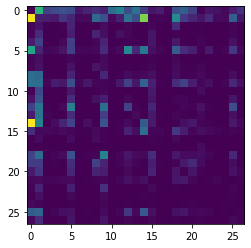

In [57]:
plt.imshow(hash_map)

In [83]:
p = hash_map[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [84]:
q = torch.Generator().manual_seed(23452345)

torch.multinomial(p,num_samples=20, replacement=True, generator=q)

tensor([ 3,  8, 11, 13, 11,  9,  1, 13, 18, 13, 18, 13,  5, 15, 25,  1, 19, 22,
         8, 10])